# Foward model

Test some properties of spherical forward head models with MNE-python

In [1]:
%matplotlib qt
import mne # Loading the mne environment
import numpy as np
import math
import matplotlib.pyplot as plt

## Create spherical head model

Create spherical model
The model is defined by
- a center for the concentric spheres
- the relative radii of the various spheres (from inner to outer).
- the conductivities of each domain (there is an implicit null conductivity outer domain).

In [2]:
center = (0., 0., 0.)
radii = (0.90, 0.92, 0.97, 1.0)
sigmas = (0.33, 1.0, 0.004, 0.33) #conductivity 
sphere = mne.make_sphere_model(r0=center, head_radius=0.09, relative_radii=radii,sigmas=sigmas)


Equiv. model fitting -> RV = 0.00349057 %
mu1 = 0.944702    lambda1 = 0.137194
mu2 = 0.667435    lambda2 = 0.683781
mu3 = -0.26548    lambda3 = -0.0106058
Set up EEG sphere model with scalp radius    90.0 mm



In [ ]:
print(sphere)

## Create source space

In [ ]:
#sources = mne.setup_volume_source_space(sphere=sphere, pos=5.0)
positions = np.array([[0,0,r] for r in np.arange(0.01,0.09,0.01)])
radial_orientations = np.array([[0,0,1] for r in positions])
tangential_orientations = np.array([[0,1,0] for r in positions]) #y direction
dipoles = { 'rr' : np.concatenate((positions,positions)), 
            'nn' : np.concatenate((radial_orientations,tangential_orientations)) }
sources = mne.setup_volume_source_space(sphere=sphere, pos=dipoles)

### Visualize the geometry

In [37]:
identity = mne.transforms.Transform('head', 'mri', np.eye(4))
mne.viz.plot_alignment(bem=sphere, surfaces=['brain', 'inner_skull', 'outer_skull', 'outer_skin'], src=sources, show_axes=True, trans=identity)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`


In [38]:
mne.viz.plot_alignment(bem=sphere, surfaces=['brain'], src=sources, show_axes=True, trans=identity)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`


In [39]:
times = range(len(positions))
gof = np.ones(len(positions)) # Goodness of fit, not used here
amplitudes = 1e-7*np.ones(len(positions))
radial_dipoles = mne.Dipole(times, positions, amplitudes, radial_orientations, gof)
tangential_dipoles = mne.Dipole(times, positions, amplitudes, tangential_orientations, gof)

In [25]:
fig = mne.viz.plot_alignment(bem=sphere, surfaces=['outer_skull', 'outer_skin'], show_axes=True, trans='fsaverage')
fig = mne.viz.plot_dipole_locations(dipoles=radial_dipoles, mode='arrow', color=(0., 0., 1.), fig=fig)
fig = mne.viz.plot_dipole_locations(dipoles=tangential_dipoles, mode='arrow', color=(1., 0., 0.), fig=fig)
mne.viz.set_3d_view(figure=fig, azimuth=70, elevation=80, distance=0.5)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`


## Create sensors
Sensors are borrowed from an existing dataset, because it is too difficult to create them from scratch

In [40]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /user/papadop/home/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


## Simulate the forward problem

### Radial dipoles

In [41]:
r_fwd,r_stc = mne.make_forward_dipole(radial_dipoles,sphere,info=raw.info)
r_predictions = mne.simulation.simulate_evoked(r_fwd, r_stc, raw.info, cov=None, nave=np.inf)

Positions (in meters) and orientations
8 sources
Source space          : <SourceSpaces: [<discrete, n_used=8>] head coords, ~3 kB>
MRI -> head transform : identity
Measurement data      : instance of Info
Sphere model      : origin at [0. 0. 0.] mm
Standard field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 8 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.977991      64.74 mm
     0.000000  0.000000  0.000000       1.00
MEG coil definitions created in head coordinates.
Read  60 EEG cha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


#### Show results
Play with the ch_type parameter of plot_params to view eeg or meg data. Possible values are 'eeg', 'mag' or 'grad'.

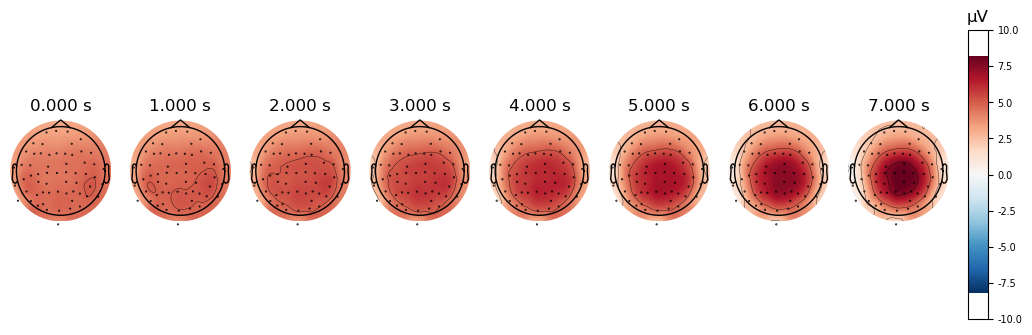

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=[10., 3.4],
                         gridspec_kw=dict(width_ratios=np.concatenate((np.ones(8),[0.2])),top=0.85))
plot_params = dict(times=times, ch_type='eeg', outlines='head', colorbar=True, time_unit='s')
r_predictions.plot_topomap(axes=axes, **plot_params)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=[10., 3.4],
                         gridspec_kw=dict(width_ratios=np.concatenate((np.ones(8),[0.2])),top=0.85))
plot_params = dict(times=times, ch_type='grad', outlines='head', colorbar=True, time_unit='s')
r_predictions.plot_topomap(axes=axes, **plot_params)

#let change ch_type to 'grad','mag'

### Tangential dipoles

In [44]:
t_fwd,t_stc = mne.make_forward_dipole(tangential_dipoles,sphere,info=raw.info)
t_predictions = mne.simulation.simulate_evoked(t_fwd, t_stc, raw.info, cov=None, nave=np.inf)

Positions (in meters) and orientations
8 sources
Source space          : <SourceSpaces: [<discrete, n_used=8>] head coords, ~3 kB>
MRI -> head transform : identity
Measurement data      : instance of Info
Sphere model      : origin at [0. 0. 0.] mm
Standard field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 8 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.977991      64.74 mm
     0.000000  0.000000  0.000000       1.00
MEG coil definitions created in head coordinates.
Read  60 EEG cha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


#### Show results
Play with the ch_type parameter of plot_params to view eeg or meg data. Possible values are 'eeg', 'mag' or 'grad'.

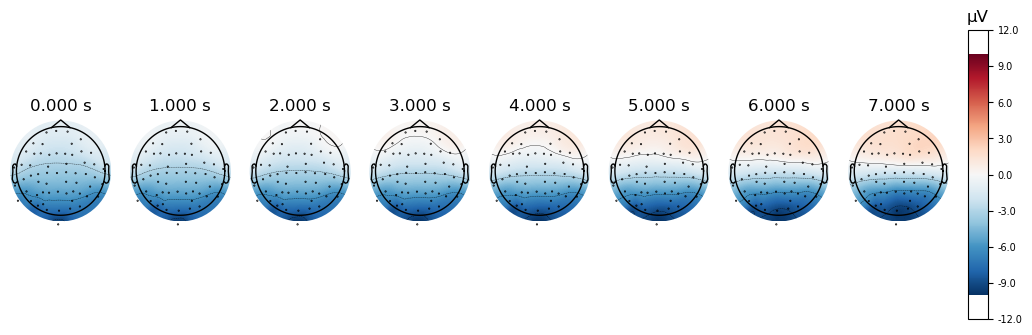

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=[10., 3.4],
                         gridspec_kw=dict(width_ratios=np.concatenate((np.ones(8),[0.2])),top=0.85))
plot_params = dict(times=times, ch_type='eeg', outlines='head', colorbar=True, time_unit='s')
t_predictions.plot_topomap(axes=axes, **plot_params)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=[10., 3.4],
                         gridspec_kw=dict(width_ratios=np.concatenate((np.ones(8),[0.2])),top=0.85))
plot_params = dict(times=times, ch_type='eeg', outlines='head', colorbar=True, time_unit='s')
t_predictions.plot_topomap(axes=axes, **plot_params)

#let change ch_type to 'grad','mag'